### 1-1. 라이브러리 설치

In [47]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [48]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

plt.rcParams["figure.autolayout"] = True # plt 사이즈 자동화

### 1-3. 한글 글꼴 설정(Windows)

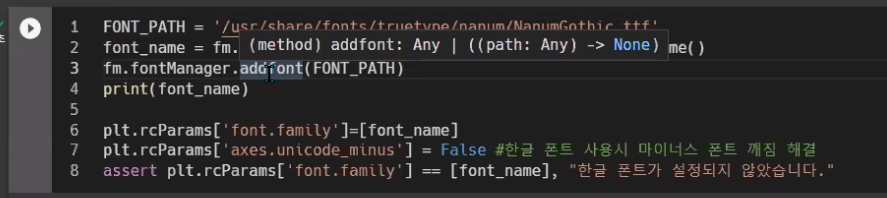

In [49]:
# # 실행 완료 후 런타임 재시작 필요 ! ! !
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

In [51]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [52]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [53]:
# !sudo apt-get install -y fonts-nanum

In [54]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 1-4. 구글드라이브 연결(Colab)

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [56]:
train = pd.read_csv("/content/drive/MyDrive/AIVLE/4월/4차 미니프로젝트/train.csv")
train.shape

(3706, 2)

In [57]:
train.tail()

,text,label
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [58]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [59]:
# 전체 train 중에서 빈 컬럼이 있는지 확인
train['text_length'] = train['text'].apply(lambda x : len(x))
len_count = 0
for i in range(len(train['text_length'])): 
    if train['text_length'][i] == 0:
        len_count += 1
len_count

0

In [60]:
train['label'].value_counts()

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

In [61]:
txt_len_mean = train["text_length"].sum()/len(train["text_length"])

,count,mean,std,min,25%,50%,75%,max
text_length,3706.0,200.957366,330.558868,9.0,68.0,118.0,222.0,6012.0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

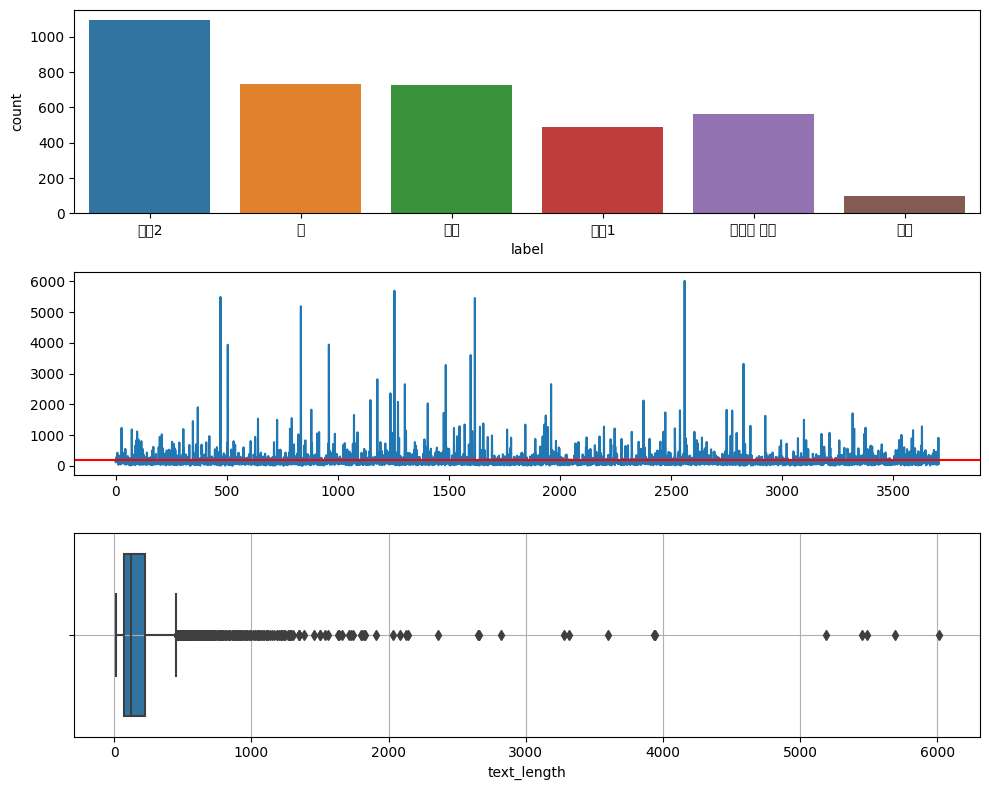

In [62]:
display(train[['text_length']].describe().T)

plt.figure(figsize=(10, 8))

plt.subplot(311)
sns.countplot(x='label', data=train) # 라벨의 분포도 확인인

plt.subplot(312)
plt.plot(train["text_length"]) # 문의글의 글자 수 확인인
plt.axhline(txt_len_mean, color='r')

plt.subplot(313)
ax = sns.boxplot(x = train['text_length'])

plt.grid()
plt.show()

## 3.데이터 탐색하기


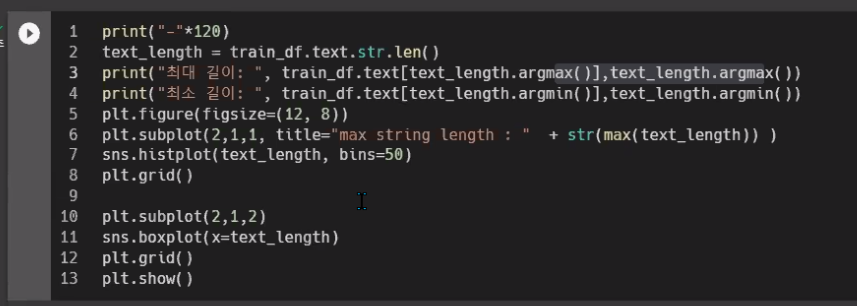

### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

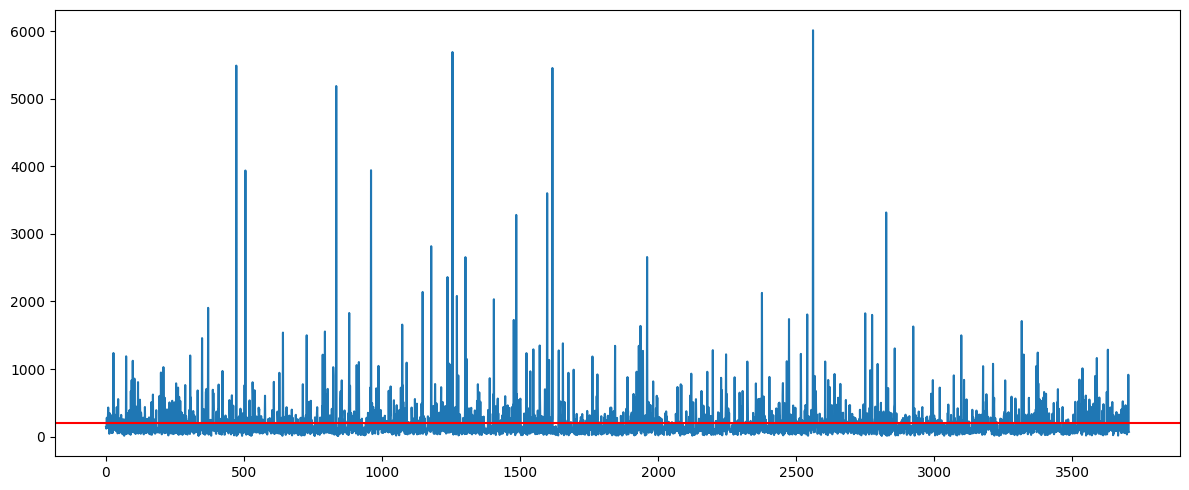

In [63]:
plt.figure(figsize=(12, 5))
plt.plot(train["text_length"]) # 문의글의 글자 수 확인
plt.axhline(txt_len_mean, color='r')

In [64]:
len_min = train['text_length'].min()
len_max = train['text_length'].max()
len_min, len_max

(9, 6012)

In [65]:
# 최대, 최소 길이 row 확인하기
train.loc[(train['text_length'] == len_min) | (train['text_length'] == len_max)]

,text,label,text_length
756,원격 부탁드립니다,원격,9
841,지원부탁드립니다!,원격,9
2561,sns.kdeplot(x = td[var])\nplt.show()\n\n------...,코드2,6012


### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

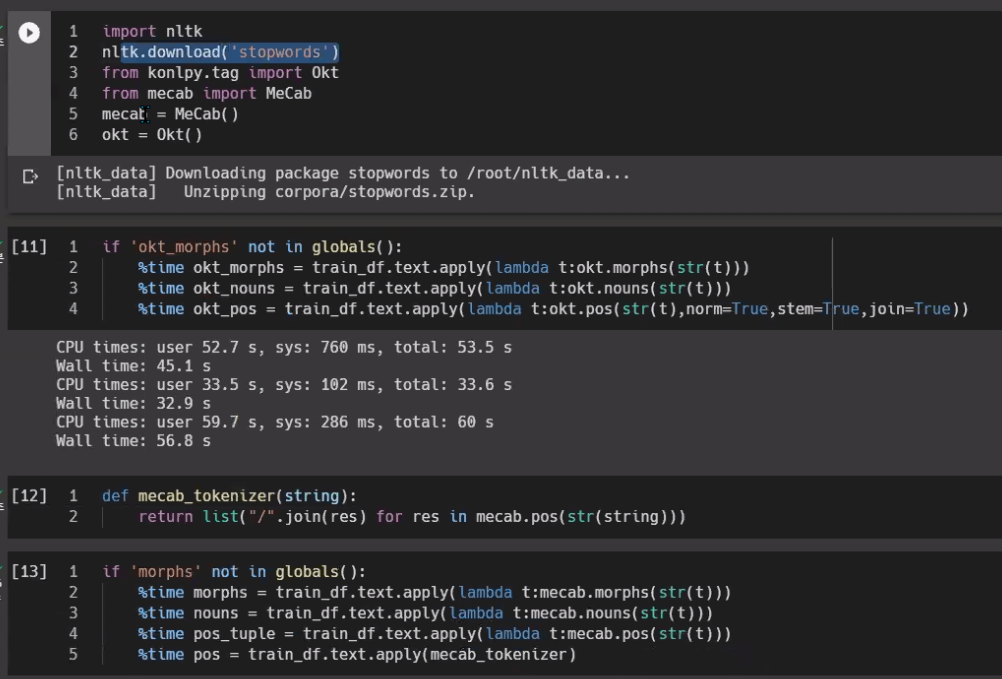

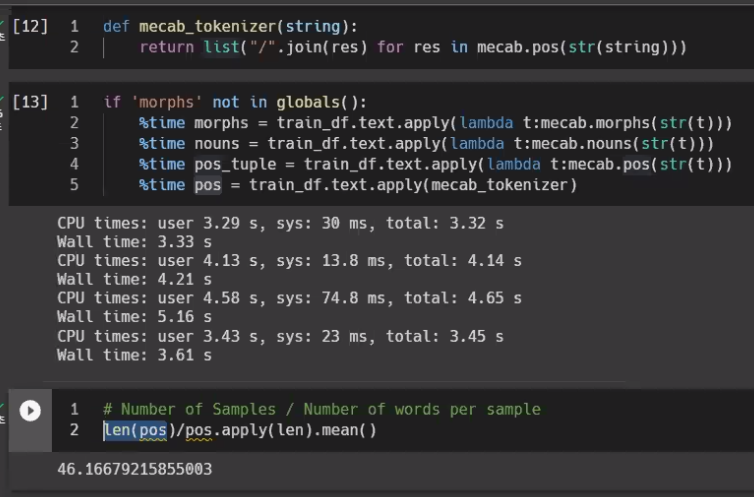

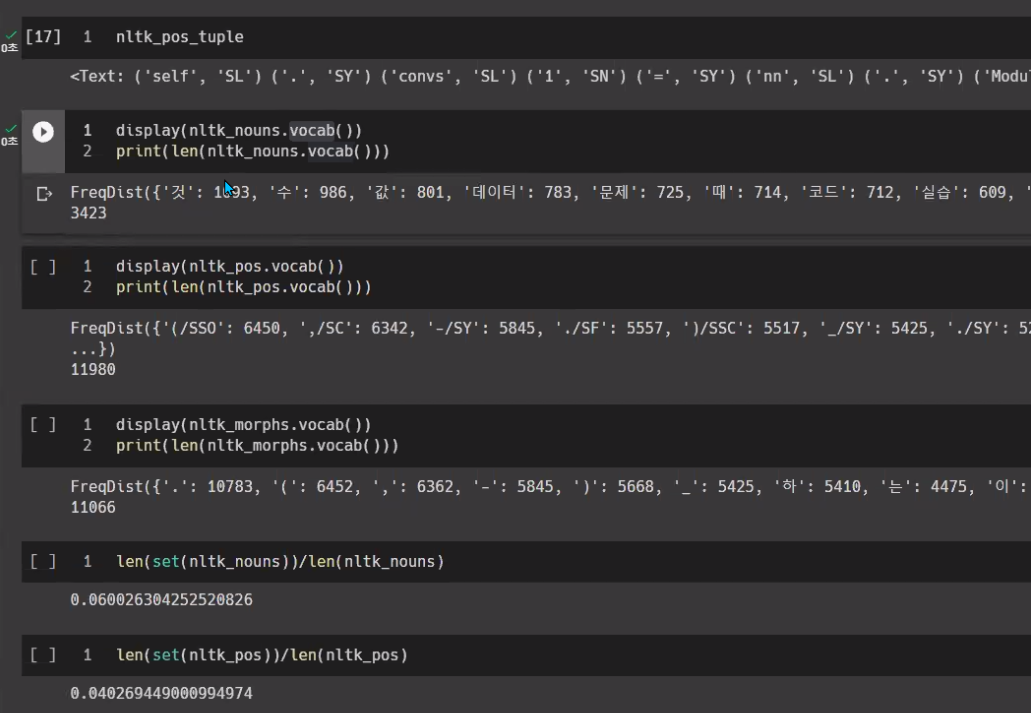

### NLTK로 토큰화하기

In [66]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [67]:
tt_seq = [] #각 row를 nltk 토큰화한 후 리스트에 담기기
for sentence in train['text']:
    tt_seq.append(text_to_word_sequence(sentence))

In [68]:
# 생성결과 확인
train['text'][0], tt_seq[0]

('self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])\n1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.',
 ['self',
  'convs1',
  'nn',
  'modulelist',
  'nn',
  'conv2d',
  '1',
  'co',
  'k',
  '100',
  'for',
  'k',
  'in',
  'ks',
  '1',
  '여기서',
  '커널사이즈',
  'k',
  '100',
  '은',
  '한',
  '단어의',
  '최대',
  '길이가',
  '100이',
  '넘지않는다는',
  '가정으로',
  '그냥',
  '100으로',
  '선언한',
  '것인지',
  '궁금합니다'])

In [69]:
train['text_seq'] = tt_seq
train.head()

,text,label,text_length,text_seq
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144,"[self, convs1, nn, modulelist, nn, conv2d, 1, ..."
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119,"[현재, 이미지를, 여러개, 업로드, 하기, 위해, 자바스크립트로, 동적으로, 폼,..."
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147,"[glob, glob, path, 를, 사용할, 때, 질문입니다, path에, 가,..."
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279,"[tmpp, tmp, groupby, by, 'addr1', as, index, f..."
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144,"[filename, test, image, str, round, frame, sec..."


### N-Grams로 토큰화하기

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
example = ["result = np.array(result)\nprint('성능정보:', result.round(2)) \nprint('최고성능:', result.max().round(2))\nprint('파라미터:', result.argmax()+1 )\n\n여기서 argmax 메소드가 어떤기능을 하는지, 또 +1을 왜하는지 궁금합니다."]
vect = CountVectorizer(ngram_range=(2,2)).fit(example)
vect = vect.vocabulary_
vect

{'result np': 11,
 'np array': 5,
 'array result': 3,
 'result print': 12,
 'print 성능정보': 6,
 '성능정보 result': 16,
 'result round': 13,
 'round print': 14,
 'print 최고성능': 7,
 '최고성능 result': 20,
 'result max': 10,
 'max round': 4,
 'print 파라미터': 8,
 '파라미터 result': 21,
 'result argmax': 9,
 'argmax 여기서': 2,
 '여기서 argmax': 18,
 'argmax 메소드가': 1,
 '메소드가 어떤기능을': 15,
 '어떤기능을 하는지': 17,
 '하는지 1을': 22,
 '1을 왜하는지': 0,
 '왜하는지 궁금합니다': 19}

In [ ]:
for i in train['text']:
    if len(i) > 0:
        print(i)
        # vect = CountVectorizer(ngram_range=(2, 2)).fit([i]).vocabulary_

# vect 

In [ ]:
corpus = []
for sent in range(len(train)):
    # print([sent])
    temp = []
    vect = CountVectorizer(ngram_range=(1, 2)).fit([train['text'][sent]])
    vect = vect.vocabulary_
    corpus.append(vect)
corpus

In [ ]:
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

In [118]:
 train['text'][1]

'현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요'

In [120]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

sample = ['self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])', '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요']
vectorizer = CountVectorizer()
vect = vectorizer.fit_transform(sample).toarray()
print(vect)

[[1 1 1 1 1 1 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1]]


In [122]:
array = []
for sent in train['text']:
    # print(sent)
    vectorizer = CountVectorizer()
    vect = vectorizer.fit_transform([sent]).toarray()
    array.append(vect)
train['array'] = array

In [78]:
train['n-grams'] = corpus

In [123]:
train.tail()

,text,label,text_length,text_seq,n-grams,mecab_nouns,mecab_pos,mecab_morphs,label_enc,array
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2,168,"[토큰화, 이후, train, val, 를, 분리하고, 각, train, set, ...","{'토큰화': 53, '이후': 40, 'train': 8, 'val': 11, '...","[토큰, 이후, 분리, 벡터, 진행, 데이터, 전, 번, 벡터, 진행, 상관, 머신...","[(토큰, NNG), (화, XSN), (이후, NNG), (train, SL), ...","[토큰, 화, 이후, train, val, 를, 분리, 하, 고, 각, train,...",0,"[[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,..."
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영,75,"[올린, 값들, 중, 최고점인, 건가요, 아니면, 최근에, 올린, 파일로, 무조건,...","{'올린': 23, '값들': 0, '최고점인': 28, '건가요': 6, '아니면...","[값, 중, 최고점, 건가요, 최근, 파일, 갱신, 최고점, 값, 경우, 변경, 것]","[(올린, VV+ETM), (값, NNG), (들, XSN), (중, NNB), (...","[올린, 값, 들, 중, 최고점, 인, 건가요, ?, 아니면, 최근, 에, 올린, ...",3,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,..."
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론,915,"[수업에서, cacoo랑, packet, tracer를, 배우는, 이유가, 1, i...","{'수업에서': 158, 'cacoo랑': 2, 'packet': 16, 'trac...","[수업, 이유, 인프라, 구조, 이해, 시간, 인프라, 구축, 설계, 구성, 비유,...","[(수업, NNG), (에서, JKB), (cacoo, SL), (랑, JC), (...","[수업, 에서, cacoo, 랑, packet, tracer, 를, 배우, 는, 이...",2,"[[1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1,..."
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격,75,"[inplace, true, 해도, 값이, 변경이, 안되고, none으로, 뜹니다,...","{'inplace': 0, 'true': 4, '해도': 25, '값이': 9, '...","[값, 변경, 원격, 지원, 가능]","[(inplace, SL), (=, SY), (True, SL), (해도, VV+E...","[inplace, =, True, 해도, 값, 이, 변경, 이, 안, 되, 고, n...",4,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]"
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론,69,"[상관관계는, 그렇게, 크지, 않게, 나오는데, p, value, 값은, 관련이, ...","{'상관관계는': 13, '그렇게': 8, '크지': 23, '않게': 15, '나...","[상관, 관계, 값, 관련, 경우, 해석]","[(상관, NNG), (관계, NNG), (는, JX), (그렇게, MAG), (크...","[상관, 관계, 는, 그렇게, 크, 지, 않, 게, 나오, 는데, p, -, val...",2,"[[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]]"


In [126]:
train['array'][0]

array([[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]])

In [124]:
train.to_csv('/content/drive/MyDrive/AIVLE/4월/4차 미니프로젝트/for_train.csv')

### DataFrame에 토큰값 넣어두기
- 이미 만들어둔 mecab_morphs, nouns, pos는 각 행의 정보를 저장하고 있지 않으므로 따로 만들어줌

In [84]:
m = MeCab()

mecab_nouns_list = []
mecab_pos_list = []
mecab_morphs_list = []
for i in train['text']:
    mecab_nouns_list.append(m.nouns(i))
    mecab_pos_list.append(m.pos(i))
    mecab_morphs_list.append(m.morphs(i))

train["mecab_nouns"] = mecab_nouns_list
train["mecab_pos"] = mecab_pos_list
train["mecab_morphs"] = mecab_morphs_list

In [85]:
train.tail()

,text,label,text_length,text_seq,n-grams,mecab_nouns,mecab_pos,mecab_morphs
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2,168,"[토큰화, 이후, train, val, 를, 분리하고, 각, train, set, ...","{'토큰화': 53, '이후': 40, 'train': 8, 'val': 11, '...","[토큰, 이후, 분리, 벡터, 진행, 데이터, 전, 번, 벡터, 진행, 상관, 머신...","[(토큰, NNG), (화, XSN), (이후, NNG), (train, SL), ...","[토큰, 화, 이후, train, val, 를, 분리, 하, 고, 각, train,..."
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영,75,"[올린, 값들, 중, 최고점인, 건가요, 아니면, 최근에, 올린, 파일로, 무조건,...","{'올린': 23, '값들': 0, '최고점인': 28, '건가요': 6, '아니면...","[값, 중, 최고점, 건가요, 최근, 파일, 갱신, 최고점, 값, 경우, 변경, 것]","[(올린, VV+ETM), (값, NNG), (들, XSN), (중, NNB), (...","[올린, 값, 들, 중, 최고점, 인, 건가요, ?, 아니면, 최근, 에, 올린, ..."
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론,915,"[수업에서, cacoo랑, packet, tracer를, 배우는, 이유가, 1, i...","{'수업에서': 158, 'cacoo랑': 2, 'packet': 16, 'trac...","[수업, 이유, 인프라, 구조, 이해, 시간, 인프라, 구축, 설계, 구성, 비유,...","[(수업, NNG), (에서, JKB), (cacoo, SL), (랑, JC), (...","[수업, 에서, cacoo, 랑, packet, tracer, 를, 배우, 는, 이..."
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격,75,"[inplace, true, 해도, 값이, 변경이, 안되고, none으로, 뜹니다,...","{'inplace': 0, 'true': 4, '해도': 25, '값이': 9, '...","[값, 변경, 원격, 지원, 가능]","[(inplace, SL), (=, SY), (True, SL), (해도, VV+E...","[inplace, =, True, 해도, 값, 이, 변경, 이, 안, 되, 고, n..."
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론,69,"[상관관계는, 그렇게, 크지, 않게, 나오는데, p, value, 값은, 관련이, ...","{'상관관계는': 13, '그렇게': 8, '크지': 23, '않게': 15, '나...","[상관, 관계, 값, 관련, 경우, 해석]","[(상관, NNG), (관계, NNG), (는, JX), (그렇게, MAG), (크...","[상관, 관계, 는, 그렇게, 크, 지, 않, 게, 나오, 는데, p, -, val..."


In [86]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

In [98]:
label_enc = []
for i in train['label']:
    if i == '코드1' or i == '코드2':
        label_enc.append(0)
    elif i == '웹':
        label_enc.append(1)
    elif i == '이론':
        label_enc.append(2)
    elif i == '시스템 운영':
        label_enc.append(3)
    elif i == '원격'
        label_enc.append(4)

train['label_enc'] = label_enc
train.tail()

,text,label,text_length,text_seq,n-grams,mecab_nouns,mecab_pos,mecab_morphs,label_enc
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2,168,"[토큰화, 이후, train, val, 를, 분리하고, 각, train, set, ...","{'토큰화': 53, '이후': 40, 'train': 8, 'val': 11, '...","[토큰, 이후, 분리, 벡터, 진행, 데이터, 전, 번, 벡터, 진행, 상관, 머신...","[(토큰, NNG), (화, XSN), (이후, NNG), (train, SL), ...","[토큰, 화, 이후, train, val, 를, 분리, 하, 고, 각, train,...",0
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영,75,"[올린, 값들, 중, 최고점인, 건가요, 아니면, 최근에, 올린, 파일로, 무조건,...","{'올린': 23, '값들': 0, '최고점인': 28, '건가요': 6, '아니면...","[값, 중, 최고점, 건가요, 최근, 파일, 갱신, 최고점, 값, 경우, 변경, 것]","[(올린, VV+ETM), (값, NNG), (들, XSN), (중, NNB), (...","[올린, 값, 들, 중, 최고점, 인, 건가요, ?, 아니면, 최근, 에, 올린, ...",3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론,915,"[수업에서, cacoo랑, packet, tracer를, 배우는, 이유가, 1, i...","{'수업에서': 158, 'cacoo랑': 2, 'packet': 16, 'trac...","[수업, 이유, 인프라, 구조, 이해, 시간, 인프라, 구축, 설계, 구성, 비유,...","[(수업, NNG), (에서, JKB), (cacoo, SL), (랑, JC), (...","[수업, 에서, cacoo, 랑, packet, tracer, 를, 배우, 는, 이...",2
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격,75,"[inplace, true, 해도, 값이, 변경이, 안되고, none으로, 뜹니다,...","{'inplace': 0, 'true': 4, '해도': 25, '값이': 9, '...","[값, 변경, 원격, 지원, 가능]","[(inplace, SL), (=, SY), (True, SL), (해도, VV+E...","[inplace, =, True, 해도, 값, 이, 변경, 이, 안, 되, 고, n...",4
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론,69,"[상관관계는, 그렇게, 크지, 않게, 나오는데, p, value, 값은, 관련이, ...","{'상관관계는': 13, '그렇게': 8, '크지': 23, '않게': 15, '나...","[상관, 관계, 값, 관련, 경우, 해석]","[(상관, NNG), (관계, NNG), (는, JX), (그렇게, MAG), (크...","[상관, 관계, 는, 그렇게, 크, 지, 않, 게, 나오, 는데, p, -, val...",2


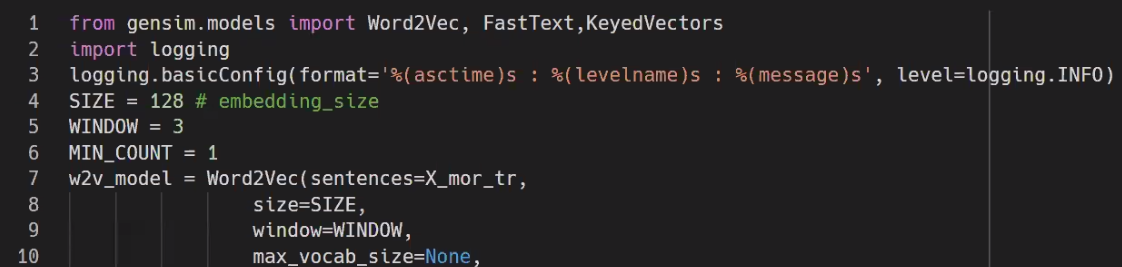

In [103]:
from gensim.models import Word2Vec, FastText, KeyedVectors
import logging

logging.basicConfig(format='%(asctime)s : %(levelnames)

24